In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


In [28]:

weather_api_key = "4ec6d8e1ae81121aede0df10f12e834e"
weather_api_key

'4ec6d8e1ae81121aede0df10f12e834e'

In [29]:
from citipy import citipy

In [4]:
output_data_file = "out_put/cities.csv"
lat_range = (-90,90)
lng_range = (-180,180)
print(weather_api_key)

4ec6d8e1ae81121aede0df10f12e834e


In [5]:
#List for holding lat_lngs and cities
lat_lngs = []
cities = []
#create a set of random lat long combo's
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#identify nearest city for each lat & lng combo
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
#     if the city is unique append(add to the cities list)
    if city not in cities:
        cities.append(city)
        
len(cities)



629

In [6]:
#generate city list
cities


['oksbol',
 'chokurdakh',
 'grahamstown',
 'mount gambier',
 'asau',
 'bilibino',
 'tsihombe',
 'tobetsu',
 'pangnirtung',
 'bluff',
 'new norfolk',
 'touros',
 'maniitsoq',
 'havre-saint-pierre',
 'mehamn',
 'albany',
 'cape town',
 'wodonga',
 'busselton',
 'terme',
 'salalah',
 'lebu',
 'ust-nera',
 'aswan',
 'galgani',
 'uige',
 'sao joao da barra',
 'dikson',
 'homer',
 'ushuaia',
 'butaritari',
 'lasa',
 'coihaique',
 'qaqortoq',
 'comayagua',
 'punta arenas',
 'agadir',
 'dunedin',
 'fort frances',
 'nikolskoye',
 'puerto ayora',
 'kysyl-syr',
 'korla',
 'teknaf',
 'attawapiskat',
 'avera',
 'russell',
 'mataura',
 'namatanai',
 'luganville',
 'port elizabeth',
 'nelson bay',
 'caravelas',
 'tecoh',
 'aybak',
 'atuona',
 'porto torres',
 'khatanga',
 'port alfred',
 'pevek',
 'jamestown',
 'grindavik',
 'kalianget',
 'santa isabel do rio negro',
 'kruisfontein',
 'rikitea',
 'aflu',
 'gamba',
 'agadez',
 'opuwo',
 'bredasdorp',
 'novo aripuana',
 'tessalit',
 'hambantota',
 'lie

In [7]:
#starting URL to pull api call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4ec6d8e1ae81121aede0df10f12e834e"
url



'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4ec6d8e1ae81121aede0df10f12e834e'

In [8]:
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4ec6d8e1ae81121aede0df10f12e834e'

In [9]:
#list of data
city_data = []

#print to logger
print("Beginner Data Retrieval")
print("---------------")
#don't forget spacing ***python forloop has to be inside of forloop until the end

#counters
record_count = 1
set_count = 1

#loop through cities (enumerate = going through cities one by one)
for i, city in enumerate(cities):
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 0
        
    #create endpoint URL with each city
    city_url = url + "&q=" + city
    
    #log the url, record and set number (where ever you see % pass the array (items) below every time)
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    #add 1 to the record count (what is was plus one)
    record_count += 1
    
    #run an API request for each of the cities
    try:
        #parse the JSON and retrieve 
        city_weather = requests.get(city_url).json()
                 
        
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
                                
        #if city not found go to next
    except:
        print("City not found, move on to the next...")
        pass
        
#indicate data loading is done
print("-------------------")
print("Data Retrieval Complete")
print("--------------------")

Beginner Data Retrieval
---------------
Processing Record 1 of Set 1 | oksbol
Processing Record 2 of Set 1 | chokurdakh
Processing Record 3 of Set 1 | grahamstown
Processing Record 4 of Set 1 | mount gambier
Processing Record 5 of Set 1 | asau
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | tsihombe
City not found, move on to the next...
Processing Record 8 of Set 1 | tobetsu
Processing Record 9 of Set 1 | pangnirtung
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | touros
Processing Record 13 of Set 1 | maniitsoq
Processing Record 14 of Set 1 | havre-saint-pierre
Processing Record 15 of Set 1 | mehamn
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | wodonga
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | terme
Processing Record 21 of Set 1 | salalah
Processing Record 22 of Set 1 | lebu
Processing Record 23 of 

Processing Record 33 of Set 4 | lavrentiya
Processing Record 34 of Set 4 | mys shmidta
City not found, move on to the next...
Processing Record 35 of Set 4 | torbay
Processing Record 36 of Set 4 | belmonte
Processing Record 37 of Set 4 | mudyuga
City not found, move on to the next...
Processing Record 38 of Set 4 | fortuna
Processing Record 39 of Set 4 | lingao
Processing Record 40 of Set 4 | tabuleiro do norte
Processing Record 41 of Set 4 | abilene
Processing Record 42 of Set 4 | tuyen quang
Processing Record 43 of Set 4 | tlacotepec
Processing Record 44 of Set 4 | westport
Processing Record 45 of Set 4 | baiao
Processing Record 46 of Set 4 | sinnamary
Processing Record 47 of Set 4 | nome
Processing Record 48 of Set 4 | riyadh
Processing Record 49 of Set 4 | orsha
Processing Record 0 of Set 5 | cookeville
Processing Record 1 of Set 5 | chuy
Processing Record 2 of Set 5 | ancud
Processing Record 3 of Set 5 | paita
Processing Record 4 of Set 5 | cayenne
Processing Record 5 of Set 5 | c

Processing Record 18 of Set 8 | chumphon
Processing Record 19 of Set 8 | palabuhanratu
City not found, move on to the next...
Processing Record 20 of Set 8 | tiarei
Processing Record 21 of Set 8 | dhar
Processing Record 22 of Set 8 | vila franca do campo
Processing Record 23 of Set 8 | pierre
Processing Record 24 of Set 8 | tabiauea
City not found, move on to the next...
Processing Record 25 of Set 8 | puerto escondido
Processing Record 26 of Set 8 | labutta
City not found, move on to the next...
Processing Record 27 of Set 8 | sao felix do xingu
Processing Record 28 of Set 8 | mandal
Processing Record 29 of Set 8 | gomel
Processing Record 30 of Set 8 | cabedelo
Processing Record 31 of Set 8 | cucer
City not found, move on to the next...
Processing Record 32 of Set 8 | ambajogai
Processing Record 33 of Set 8 | los andes
Processing Record 34 of Set 8 | quatre cocos
Processing Record 35 of Set 8 | kambove
Processing Record 36 of Set 8 | east london
Processing Record 37 of Set 8 | te anau

Processing Record 0 of Set 12 | erenhot
Processing Record 1 of Set 12 | babati
Processing Record 2 of Set 12 | saleaula
City not found, move on to the next...
Processing Record 3 of Set 12 | qandahar
City not found, move on to the next...
Processing Record 4 of Set 12 | cheyenne
Processing Record 5 of Set 12 | kismayo
Processing Record 6 of Set 12 | bow island
Processing Record 7 of Set 12 | bandarbeyla
Processing Record 8 of Set 12 | pangai
Processing Record 9 of Set 12 | moron
Processing Record 10 of Set 12 | port-gentil
Processing Record 11 of Set 12 | tsaratanana
Processing Record 12 of Set 12 | tornio
Processing Record 13 of Set 12 | dali
Processing Record 14 of Set 12 | henties bay
Processing Record 15 of Set 12 | gambissara
Processing Record 16 of Set 12 | gore
Processing Record 17 of Set 12 | zapolyarnyy
Processing Record 18 of Set 12 | newport
Processing Record 19 of Set 12 | kananga
Processing Record 20 of Set 12 | hualmay
Processing Record 21 of Set 12 | chuncheng
Processing

In [10]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,oksbol,55.63,8.29,48.99,87,0,9.17,DK,1604514658
1,chokurdakh,70.63,147.92,-14.19,84,0,5.84,RU,1604514658
2,grahamstown,-33.30,26.53,60.89,93,100,9.86,ZA,1604514658
3,mount gambier,-37.83,140.77,46.40,81,40,8.05,AU,1604514658
4,asau,46.43,26.40,36.00,97,0,1.39,RO,1604514658
...,...,...,...,...,...,...,...,...,...
569,ovsyanka,55.96,92.55,26.60,86,75,11.18,RU,1604514749
570,dabola,10.75,-11.12,79.12,59,0,2.44,GN,1604514749
571,vila velha,-20.33,-40.29,73.40,78,90,5.82,BR,1604514750
572,kyra,49.58,111.98,24.55,91,100,1.77,RU,1604514750


In [11]:
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [12]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,oksbol,55.63,8.29,48.99,87,0,9.17,DK,1604514658
1,chokurdakh,70.63,147.92,-14.19,84,0,5.84,RU,1604514658
2,grahamstown,-33.30,26.53,60.89,93,100,9.86,ZA,1604514658
3,mount gambier,-37.83,140.77,46.40,81,40,8.05,AU,1604514658
4,asau,46.43,26.40,36.00,97,0,1.39,RO,1604514658
...,...,...,...,...,...,...,...,...,...
569,ovsyanka,55.96,92.55,26.60,86,75,11.18,RU,1604514749
570,dabola,10.75,-11.12,79.12,59,0,2.44,GN,1604514749
571,vila velha,-20.33,-40.29,73.40,78,90,5.82,BR,1604514750
572,kyra,49.58,111.98,24.55,91,100,1.77,RU,1604514750


In [13]:
city_data

[{'City': 'oksbol',
  'Lat': 55.63,
  'Lng': 8.29,
  'Max Temp': 48.99,
  'Humidity': 87,
  'Cloudiness': 0,
  'Wind Speed': 9.17,
  'Country': 'DK',
  'Date': 1604514658},
 {'City': 'chokurdakh',
  'Lat': 70.63,
  'Lng': 147.92,
  'Max Temp': -14.19,
  'Humidity': 84,
  'Cloudiness': 0,
  'Wind Speed': 5.84,
  'Country': 'RU',
  'Date': 1604514658},
 {'City': 'grahamstown',
  'Lat': -33.3,
  'Lng': 26.53,
  'Max Temp': 60.89,
  'Humidity': 93,
  'Cloudiness': 100,
  'Wind Speed': 9.86,
  'Country': 'ZA',
  'Date': 1604514658},
 {'City': 'mount gambier',
  'Lat': -37.83,
  'Lng': 140.77,
  'Max Temp': 46.4,
  'Humidity': 81,
  'Cloudiness': 40,
  'Wind Speed': 8.05,
  'Country': 'AU',
  'Date': 1604514658},
 {'City': 'asau',
  'Lat': 46.43,
  'Lng': 26.4,
  'Max Temp': 36,
  'Humidity': 97,
  'Cloudiness': 0,
  'Wind Speed': 1.39,
  'Country': 'RO',
  'Date': 1604514658},
 {'City': 'bilibino',
  'Lat': 68.05,
  'Lng': 166.44,
  'Max Temp': 4.62,
  'Humidity': 91,
  'Cloudiness': 100,
 

In [25]:
#look at data before plotting
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,574.000000,574.000000,574.00000,574.000000,574.000000,574.000000,5.740000e+02
mean,20.814321,17.421080,58.89561,70.477352,52.789199,8.454460,1.604515e+09
std,33.283806,89.015366,23.49511,21.220163,40.168917,6.143537,5.777541e+01
min,-54.800000,-175.200000,-27.40000,14.000000,0.000000,0.250000,1.604514e+09
25%,-6.535000,-58.717500,44.60000,59.000000,3.250000,3.940000,1.604515e+09
50%,25.425000,22.060000,65.00000,76.500000,65.500000,6.920000,1.604515e+09
75%,49.362500,91.625000,77.00000,86.750000,94.000000,11.410000,1.604515e+09
max,78.220000,179.320000,100.40000,100.000000,100.000000,35.570000,1.604515e+09


# Scatter Plot latitude(x) vs. Temperature(y)
#Scatter plot linear regression vs r

In [30]:
#export df to a csv file = cities
city_data_df.to_csv(output_data_file, index_label="city id")


In [14]:
#visiting team vs home team = x vs y standard practice
#scatter plot - latitude vs temperature
#scatter plot w/linear regression and r - value

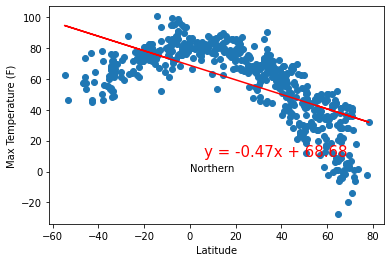

In [35]:
# Add the linear regression equation and line to plot()
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
#standard linear regression template following lines(round cuts decimal to two spaces):
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
#add plot annotate to remember how to divide visual between north and south hemispheres
plt.annotate("Northern",(0,0),fontsize=10,color="black")
plt.show()



###Analysis of the relationship between Latitude & Max Temperature:
The temperatures decrease as you move away from the equator.

The r-squared is: 0.44312990234108957


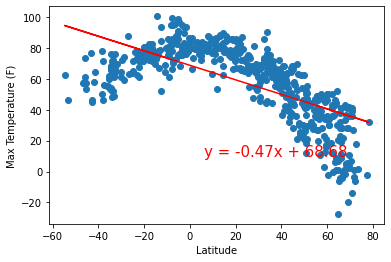

In [21]:
# Print out the r-squared value along with the plot.(r=how good is y at explaining x)
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.012134564585454142


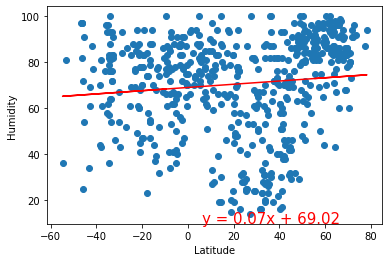

In [22]:
#y value is Humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.00016681617755293673


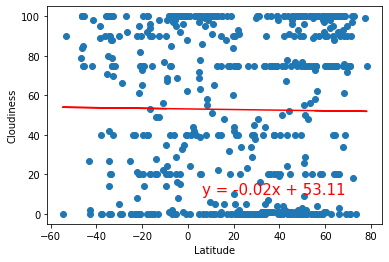

In [23]:
#y value is Cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.009631581766752344


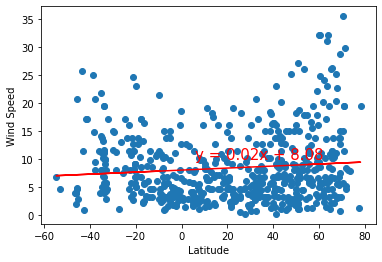

In [24]:
#y value is Wind Speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Identify northern and southern hemispheres

In [ ]:
#visualize data to determine which column to pull from

In [36]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,oksbol,55.63,8.29,48.99,87,0,9.17,DK,1604514658
1,chokurdakh,70.63,147.92,-14.19,84,0,5.84,RU,1604514658
2,grahamstown,-33.30,26.53,60.89,93,100,9.86,ZA,1604514658
3,mount gambier,-37.83,140.77,46.40,81,40,8.05,AU,1604514658
4,asau,46.43,26.40,36.00,97,0,1.39,RO,1604514658


In [38]:
#determine which column to pulll 
northern_hemisphere = city_data_df.loc[(city_data_df["Lat"] > 0)]
northern_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,oksbol,55.63,8.29,48.99,87,0,9.17,DK,1604514658
1,chokurdakh,70.63,147.92,-14.19,84,0,5.84,RU,1604514658
4,asau,46.43,26.40,36.00,97,0,1.39,RO,1604514658
5,bilibino,68.05,166.44,4.62,91,100,5.61,RU,1604514658
6,tobetsu,43.22,141.52,39.00,89,78,14.18,JP,1604514658
...,...,...,...,...,...,...,...,...,...
567,pacific grove,36.62,-121.92,64.40,63,1,3.36,US,1604514748
568,joshimath,30.57,79.57,45.46,51,0,3.44,IN,1604514749
569,ovsyanka,55.96,92.55,26.60,86,75,11.18,RU,1604514749
570,dabola,10.75,-11.12,79.12,59,0,2.44,GN,1604514749


In [39]:
southern_hemisphere = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,grahamstown,-33.30,26.53,60.89,93,100,9.86,ZA,1604514658
3,mount gambier,-37.83,140.77,46.40,81,40,8.05,AU,1604514658
8,bluff,-46.60,168.33,57.00,97,79,4.00,NZ,1604514659
9,new norfolk,-42.78,147.06,45.00,69,0,1.01,AU,1604514659
10,touros,-5.20,-35.46,86.00,58,20,13.87,BR,1604514659
...,...,...,...,...,...,...,...,...,...
556,sao francisco de assis,-29.55,-55.13,72.37,43,0,14.83,BR,1604514745
557,atambua,-9.11,124.89,74.89,80,24,3.04,ID,1604514745
564,cap malheureux,-19.98,57.61,73.00,70,65,5.01,MU,1604514748
571,vila velha,-20.33,-40.29,73.40,78,90,5.82,BR,1604514750
